In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris-dataset/iris.csv


In [62]:
# Loading the dataset
df = pd.read_csv('/kaggle/input/iris-dataset/iris.csv')

In [37]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [39]:
df.shape

(150, 5)

In [40]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [41]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [63]:
# Encoding the target catagorical value
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['species']=le.fit_transform(df['species'])

In [65]:
X =df.drop(columns=['species'])
y=df['species']

In [66]:
# Spliting the Data training and testing

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [67]:
from sklearn.preprocessing import StandardScaler
sl= StandardScaler()

xtrain=sl.fit_transform(xtrain)
xtest=sl.transform(xtest)

In [68]:
# Loading the Logistic Regression model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=200)
model.fit(xtrain,ytrain)

LogisticRegression(max_iter=200, multi_class='ovr')

In [69]:
ypred = model.predict(xtest)

In [71]:
# Accurracy Score
from sklearn.metrics import accuracy_score

accuracy= accuracy_score(ytest,ypred)
print(f'Accuracy of the model is {accuracy:.2f}')

Accuracy of the model is 0.90


<function matplotlib.pyplot.show(close=None, block=None)>

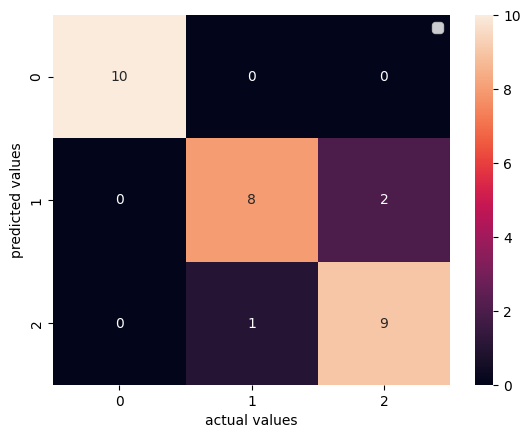

In [79]:
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns


cm= confusion_matrix(ytest,ypred)
sns.heatmap(cm,annot=True)
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.legend()
plt.show

In [83]:
classification=classification_report(ytest, ypred, target_names=le.classes_)
print(f'The classification report is {classification}')

The classification report is               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.89      0.80      0.84        10
   virginica       0.82      0.90      0.86        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30

